### Movielens Case Study

### Submitted By : Vivek Gautam
    
Background of Problem Statement :
    
The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of
Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information
filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The
project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated
collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information
by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.
Problem Objective :
Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the
ratings of any particular movie and build a model to predict the movie ratings.
Domain: Entertainment
Analysis Tasks to be performed:
1. Import the three datasets
2. Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.
(i) Merge two tables at a time.
(ii) Merge the tables using two primary keys MovieID & UserId
3. Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
(i) User Age Distribution
(ii) User rating of the movie “Toy Story”
(iii) Top 25 movies by viewership rating
(iv) Find the ratings for all the movies reviewed by for a particular user of user id = 2696 
Feature Engineering:
Use column genres:
1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the
unique categories of genres)
2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that
genre.
3. Determine the features affecting the ratings of any particular movie.
4. Develop an appropriate model to predict the movie ratings
Dataset Description :
These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined
MovieLens in 2000.

In [1]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Read the Ratings file and store it in a dataframe

ratings = pd.read_table(r'D:\DATASET\Movie Data\ratings.dat',sep = '::',
                        names=['userid','movieid','rating','timestamp'])

In [7]:
# Read the Users file and store it in a dataframe

users = pd.read_table(r'D:\DATASET\Movie Data\users.dat',sep = '::',
             names=['userid','gender','age','occupation','zipcode'])

In [8]:
# Read the Movies file and store it in a dataframe

movies = pd.read_table(r'D:\DATASET\Movie Data\movies.dat',sep = '::',
            names=['movieid','title','genre'])

In [15]:
ratings.head(10)

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [14]:
users.head(10)

,userid,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [13]:
movies.head(10)

,movieid,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [16]:
#Removing the year from the title in the movies file, so that we just retrieve the movie name.
#store it in a new column in the 'movies' dataframe. This will make our data manipulations easier.

movies['title_only'] = movies.title.str[:-7]
movies['title_only']

0                         Toy Story
1                           Jumanji
2                  Grumpier Old Men
3                 Waiting to Exhale
4       Father of the Bride Part II
                   ...             
3878               Meet the Parents
3879            Requiem for a Dream
3880                      Tigerland
3881               Two Family House
3882                 Contender, The
Name: title_only, Length: 3883, dtype: object

#### Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.

### Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [18]:
#Merging

tempDataset = pd.merge(ratings,movies,on='movieid')
tempDataset.head(10)

,userid,movieid,rating,timestamp,title,genre,title_only
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
5,18,1193,4,978156168,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
6,19,1193,5,982730936,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
7,24,1193,5,978136709,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
8,28,1193,3,978125194,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
9,33,1193,5,978557765,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest


In [20]:
final_df = pd.merge(tempDataset, users, on='userid')
final_df.head(10)

,userid,movieid,rating,timestamp,title,genre,title_only,gender,age,occupation,zipcode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,"Bug's Life, A",F,1,10,48067
5,1,1197,3,978302268,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,"Princess Bride, The",F,1,10,48067
6,1,1287,5,978302039,Ben-Hur (1959),Action|Adventure|Drama,Ben-Hur,F,1,10,48067
7,1,2804,5,978300719,"Christmas Story, A (1983)",Comedy|Drama,"Christmas Story, A",F,1,10,48067
8,1,594,4,978302268,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,Snow White and the Seven Dwarfs,F,1,10,48067
9,1,919,4,978301368,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical,"Wizard of Oz, The",F,1,10,48067


In [21]:
# Check if the dataset has any null values
final_df.isnull().sum()

userid        0
movieid       0
rating        0
timestamp     0
title         0
genre         0
title_only    0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

In [22]:
# pd.merge command used to merge all the datasets together.
# we can use this one command also to merge the 3 datasets in one statement
# master_data = pd.merge(movies,(pd.merge(users,ratings)))

## Creating the final dataset [Master_Data] with the following columns only: MovieID Title UserID Age Gender Occupation Rating

In [26]:
master_data = []
master_data = final_df[['movieid','title_only','rating','genre','userid','age','gender','occupation']]
master_data.head()

,movieid,title_only,rating,genre,userid,age,gender,occupation
0,1193,One Flew Over the Cuckoo's Nest,5,Drama,1,1,F,10
1,661,James and the Giant Peach,3,Animation|Children's|Musical,1,1,F,10
2,914,My Fair Lady,3,Musical|Romance,1,1,F,10
3,3408,Erin Brockovich,4,Drama,1,1,F,10
4,2355,"Bug's Life, A",5,Animation|Children's|Comedy,1,1,F,10


In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   userid      1000209 non-null  int64 
 1   movieid     1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   title       1000209 non-null  object
 5   genre       1000209 non-null  object
 6   title_only  1000209 non-null  object
 7   gender      1000209 non-null  object
 8   age         1000209 non-null  int64 
 9   occupation  1000209 non-null  int64 
 10  zipcode     1000209 non-null  object
dtypes: int64(6), object(5)
memory usage: 91.6+ MB


## Explore the datasets using visual representations (graphs or tables), also
## include your comments on the following:
    
## 1. User Age Distribution

Text(0.5, 1.0, 'Age Distribution of the Users')

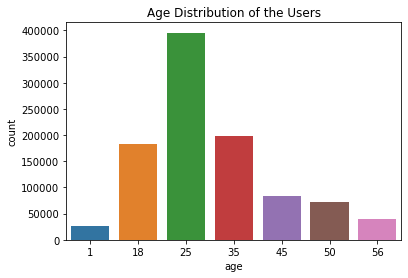

In [28]:
#Plot the Age distribution of the users

sns.countplot(x='age',data = final_df).set_title('Age Distribution of the Users')

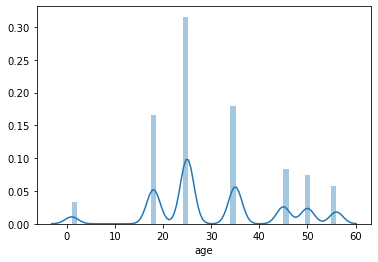

In [29]:
#User Age Distribution

sns.distplot(users.age)

In [30]:
#Subset the dataset where the title of the movie = 'Toy Story'
toy_story = final_df[final_df['title_only']=='Toy Story']
toy_story

,userid,movieid,rating,timestamp,title,genre,title_only,gender,age,occupation,zipcode
40,1,1,5,978824268,Toy Story (1995),Animation|Children's|Comedy,Toy Story,F,1,10,48067
634,18,1,4,978154768,Toy Story (1995),Animation|Children's|Comedy,Toy Story,F,18,3,95825
938,19,1,5,978555994,Toy Story (1995),Animation|Children's|Comedy,Toy Story,M,1,10,48073
1323,28,1,3,978985309,Toy Story (1995),Animation|Children's|Comedy,Toy Story,F,25,1,14607
2118,44,1,5,978019369,Toy Story (1995),Animation|Children's|Comedy,Toy Story,M,45,17,98052
...,...,...,...,...,...,...,...,...,...,...,...
986597,761,1,4,975451381,Toy Story (1995),Animation|Children's|Comedy,Toy Story,M,18,7,99945
986617,1672,1,4,974709664,Toy Story (1995),Animation|Children's|Comedy,Toy Story,M,25,17,93933
986656,4242,1,4,965312337,Toy Story (1995),Animation|Children's|Comedy,Toy Story,M,50,7,78704
986787,4925,1,5,962663249,Toy Story (1995),Animation|Children's|Comedy,Toy Story,F,35,6,55401


Text(0.5, 1.0, 'Movie Ratings for Toy Story')

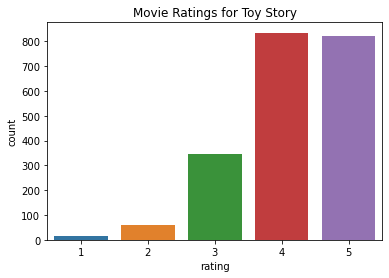

In [31]:
# Plot the ratings for the movie 'Toy Story'
sns.countplot(x='rating',data = toy_story).set_title('Movie Ratings for Toy Story')

## 3. Top 25 movies by viewership ratings.
## This means we need to get top 25 movies which got the maximum number of ratings.

. sort the data according to the ratings

. extract the movie ID and title from the data

. drop duplicates

. extract the title of top 25 mov

In [32]:
top_25 = final_df.groupby('title_only').size().sort_values(ascending=False)[:25]
top_25

title_only
American Beauty                                   3428
Star Wars: Episode IV - A New Hope                2991
Star Wars: Episode V - The Empire Strikes Back    2990
Star Wars: Episode VI - Return of the Jedi        2883
Jurassic Park                                     2672
Saving Private Ryan                               2653
Terminator 2: Judgment Day                        2649
Matrix, The                                       2590
Back to the Future                                2583
Silence of the Lambs, The                         2578
Men in Black                                      2538
Raiders of the Lost Ark                           2514
Fargo                                             2513
Sixth Sense, The                                  2459
Braveheart                                        2443
Shakespeare in Love                               2369
Princess Bride, The                               2318
Schindler's List                                  2304

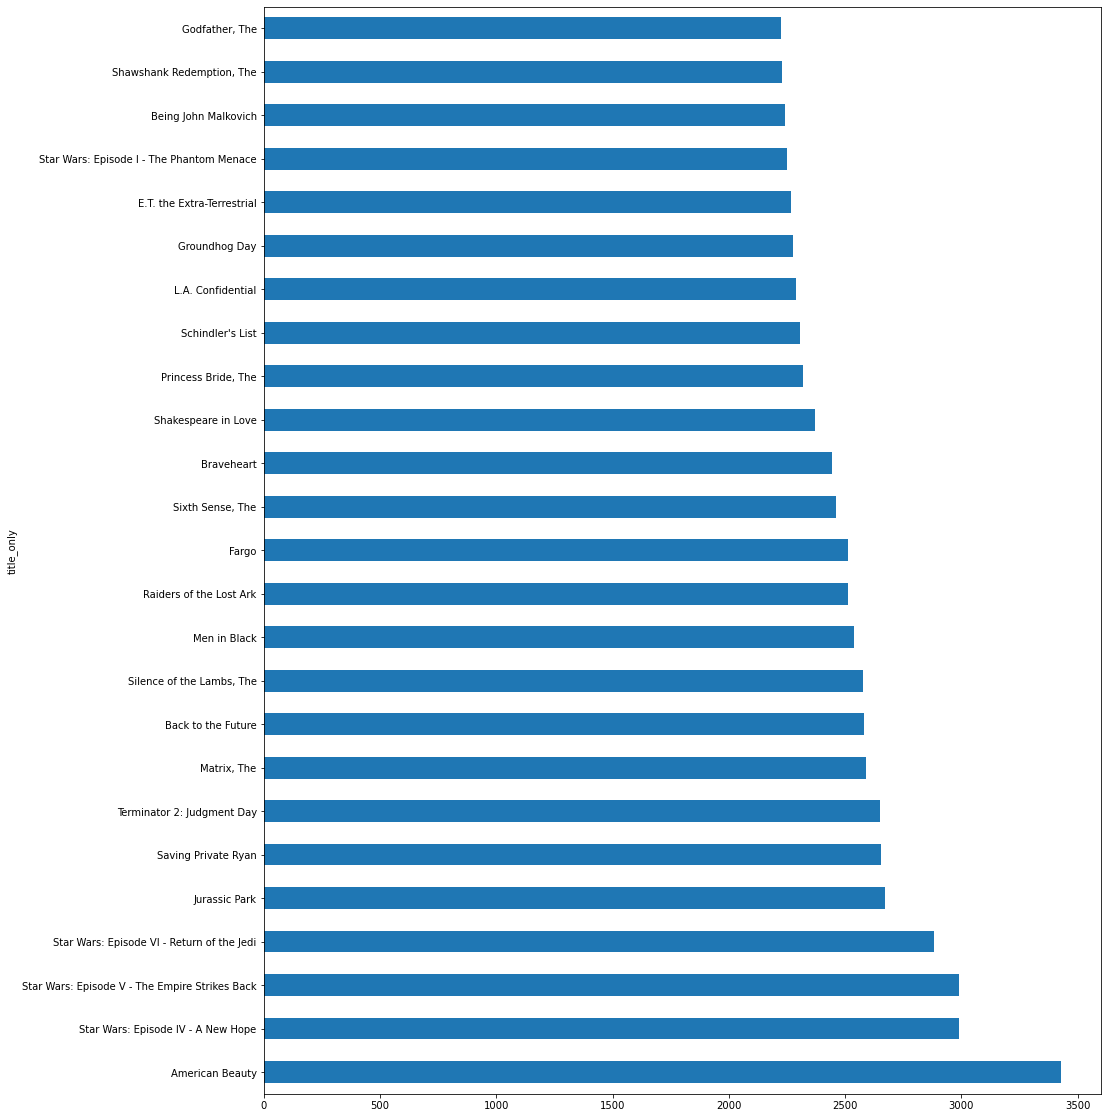

In [42]:
#Plotting the top 25 movies which received the maximum ratings
top_25.plot(kind='barh',alpha=1,figsize=(15,20))

### 4. Find the ratings for all the movies reviewed by user id = 2696


In [43]:
# Subset the dataset wehere the UserId = 2696.
user_2696 = final_df[final_df['userid']==2696]
user_2696

,userid,movieid,rating,timestamp,title,genre,title_only,gender,age,occupation,zipcode
953847,2696,1270,2,973308676,Back to the Future (1985),Comedy|Sci-Fi,Back to the Future,M,25,7,24210
953848,2696,1097,3,973308690,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,E.T. the Extra-Terrestrial,M,25,7,24210
953849,2696,1617,4,973308842,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,L.A. Confidential,M,25,7,24210
953850,2696,800,5,973308842,Lone Star (1996),Drama|Mystery,Lone Star,M,25,7,24210
953851,2696,3386,1,973308842,JFK (1991),Drama|Mystery,JFK,M,25,7,24210
953852,2696,3176,4,973308865,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller,"Talented Mr. Ripley, The",M,25,7,24210
953853,2696,1711,4,973308904,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery,Midnight in the Garden of Good and Evil,M,25,7,24210
953854,2696,1589,3,973308865,Cop Land (1997),Crime|Drama|Mystery,Cop Land,M,25,7,24210
953855,2696,1783,4,973308865,Palmetto (1998),Film-Noir|Mystery|Thriller,Palmetto,M,25,7,24210
953856,2696,1892,4,973308904,"Perfect Murder, A (1998)",Mystery|Thriller,"Perfect Murder, A",M,25,7,24210


Text(0.5, 1.0, 'Ratings for movies by user 2696')

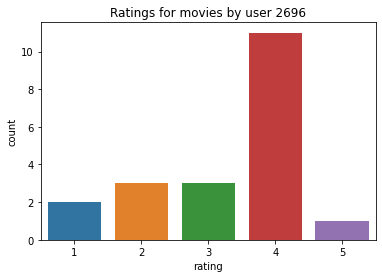

In [49]:
# Plotting the ratings given by the user 2696
sns.countplot(x='rating',data = user_2696).set_title('Ratings for movies by user 2696')

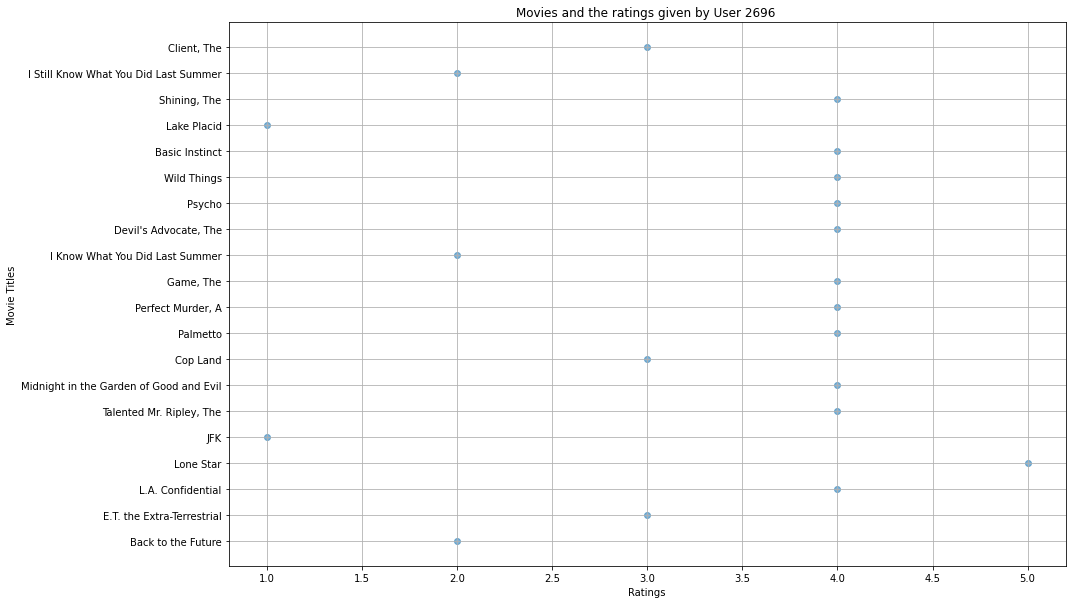

In [57]:
# Creating a scatter plot for the movies reviewed by the user 2696.

plt.figure(figsize=(15,10))
plt.scatter(user_2696.rating,user_2696.title_only, alpha=.55)
plt.title("Movies and the ratings given by User 2696 ")
plt.ylabel("Movie Titles")
plt.xlabel("Ratings")
plt.grid(b=True,which='major')
plt.show()

## Feature Engineering:
## Use column genres:
## 1. Find out all the unique genres (Hint: split the data in column genre making # a list and then process the data to find out only
## the unique categories of genres)

In [60]:
final_df.head(20)

,userid,movieid,rating,timestamp,title,genre,title_only,gender,age,occupation,zipcode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,"Bug's Life, A",F,1,10,48067
5,1,1197,3,978302268,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,"Princess Bride, The",F,1,10,48067
6,1,1287,5,978302039,Ben-Hur (1959),Action|Adventure|Drama,Ben-Hur,F,1,10,48067
7,1,2804,5,978300719,"Christmas Story, A (1983)",Comedy|Drama,"Christmas Story, A",F,1,10,48067
8,1,594,4,978302268,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,Snow White and the Seven Dwarfs,F,1,10,48067
9,1,919,4,978301368,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical,"Wizard of Oz, The",F,1,10,48067


## Find out all the unique genres

In [61]:
df_genre = pd.DataFrame(final_df['genre'].value_counts())
df_genre

,genre
Comedy,116883
Drama,111423
Comedy|Romance,42712
Comedy|Drama,42245
Drama|Romance,29170
...,...
Drama|Romance|Western,29
Children's|Fantasy,27
Comedy|Film-Noir|Thriller,5
Film-Noir|Horror,2


## Create a separate column for each genre category with a one-hot encoding ( 1 # and 0) whether or not the movie belongs to that genre.

## One hot encoding

In [62]:
from sklearn.preprocessing import LabelEncoder
gle=LabelEncoder()

In [63]:
genre_labels = gle.fit_transform(final_df['genre'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
genre_mappings

{0: 'Action',
 1: 'Action|Adventure',
 2: 'Action|Adventure|Animation',
 3: "Action|Adventure|Animation|Children's|Fantasy",
 4: 'Action|Adventure|Animation|Horror|Sci-Fi',
 5: "Action|Adventure|Children's",
 6: "Action|Adventure|Children's|Comedy",
 7: "Action|Adventure|Children's|Fantasy",
 8: "Action|Adventure|Children's|Sci-Fi",
 9: 'Action|Adventure|Comedy',
 10: 'Action|Adventure|Comedy|Crime',
 11: 'Action|Adventure|Comedy|Horror',
 12: 'Action|Adventure|Comedy|Horror|Sci-Fi',
 13: 'Action|Adventure|Comedy|Romance',
 14: 'Action|Adventure|Comedy|Sci-Fi',
 15: 'Action|Adventure|Comedy|War',
 16: 'Action|Adventure|Crime',
 17: 'Action|Adventure|Crime|Drama',
 18: 'Action|Adventure|Crime|Thriller',
 19: 'Action|Adventure|Drama',
 20: 'Action|Adventure|Drama|Romance',
 21: 'Action|Adventure|Drama|Sci-Fi|War',
 22: 'Action|Adventure|Drama|Thriller',
 23: 'Action|Adventure|Fantasy',
 24: 'Action|Adventure|Fantasy|Sci-Fi',
 25: 'Action|Adventure|Horror',
 26: 'Action|Adventure|Horror|T

In [64]:
final_df['labels']= genre_labels

In [66]:
final_df.head(10)

,userid,movieid,rating,timestamp,title,genre,title_only,gender,age,occupation,zipcode,labels
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,F,1,10,48067,239
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,F,1,10,48067,152
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,F,1,10,48067,282
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,F,1,10,48067,239
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,"Bug's Life, A",F,1,10,48067,145
5,1,1197,3,978302268,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,"Princess Bride, The",F,1,10,48067,13
6,1,1287,5,978302039,Ben-Hur (1959),Action|Adventure|Drama,Ben-Hur,F,1,10,48067,19
7,1,2804,5,978300719,"Christmas Story, A (1983)",Comedy|Drama,"Christmas Story, A",F,1,10,48067,185
8,1,594,4,978302268,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,Snow White and the Seven Dwarfs,F,1,10,48067,152
9,1,919,4,978301368,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical,"Wizard of Oz, The",F,1,10,48067,113


In [67]:
final_df.shape

(1000209, 12)

## We need to do classification problem as rating is not continuous,it is categorical

## Target column is

In [71]:
genre_all=[]

#The Genre column from the final_df is stored in 'val'

val = final_df.genre

# Run a for loop for every genre read in 'val and split it "|" and store it in temp. Then keep adding all the 
# split genre in "genre_all".

for i in val:
    temp = i.split("|")
    genre_all.extend(temp)

In [72]:
# Since genre_all contains duplicates of genre values, we need to create a unique list of genres.

unique_genre = list(set(genre_all))
unique_genre

['Adventure',
 "Children's",
 'Romance',
 'Animation',
 'Musical',
 'Thriller',
 'Sci-Fi',
 'Fantasy',
 'Western',
 'Crime',
 'War',
 'Horror',
 'Film-Noir',
 'Action',
 'Documentary',
 'Drama',
 'Mystery',
 'Comedy']

In [75]:
# now that we have split the genres and created a unique list of the same, run a for loop for every record in final_df.
# check if the unique genre exists in the 'genre' field, if it does, then a '1' will be written in that column else '0'
# This was 18 columns will be added in the dataset for the 18 genres.

for i in unique_genre:
    final_df[i] = final_df['genre'].str.contains(i)*1

In [76]:
# Print the dataset with the genre columns and values.

final_df.tail()

,userid,movieid,rating,timestamp,title,genre,title_only,gender,age,occupation,...,Western,Crime,War,Horror,Film-Noir,Action,Documentary,Drama,Mystery,Comedy
1000204,4211,3791,2,965319075,Footloose (1984),Drama,Footloose,M,45,5,...,0,0,0,0,0,0,0,1,0,0
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,MacKenna's Gold,M,45,5,...,1,0,0,0,0,0,0,0,0,0
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,Pumpkinhead,M,45,5,...,0,0,0,1,0,0,0,0,0,0
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,Missing in Action,M,45,5,...,0,0,1,0,0,1,0,0,0,0
1000208,4211,3834,2,965318885,Bronco Billy (1980),Adventure|Drama|Romance,Bronco Billy,M,45,5,...,0,0,0,0,0,0,0,1,0,0


In [77]:
# Check to see the 18 columns added in the dataset for each genre.

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 30 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   userid       1000209 non-null  int64 
 1   movieid      1000209 non-null  int64 
 2   rating       1000209 non-null  int64 
 3   timestamp    1000209 non-null  int64 
 4   title        1000209 non-null  object
 5   genre        1000209 non-null  object
 6   title_only   1000209 non-null  object
 7   gender       1000209 non-null  object
 8   age          1000209 non-null  int64 
 9   occupation   1000209 non-null  int64 
 10  zipcode      1000209 non-null  object
 11  labels       1000209 non-null  int32 
 12  Adventure    1000209 non-null  int32 
 13  Children's   1000209 non-null  int32 
 14  Romance      1000209 non-null  int32 
 15  Animation    1000209 non-null  int32 
 16  Musical      1000209 non-null  int32 
 17  Thriller     1000209 non-null  int32 
 18  Sci-Fi       1000209 n

In [78]:
#Determine the features affecting the ratings of any particular movie.
#
# Hint: Perform Chi-sqaure test between Xfeature v/s ratings ---- To do feature elimination
#
# and finalize your feature
#
# final numpy array called 'feature'

In [79]:
from scipy.stats import chi2_contingency
ct_title = pd.crosstab(final_df.title,final_df.rating)
ct_gender = pd.crosstab(final_df.gender,final_df.rating)
ct_age = pd.crosstab(final_df.age,final_df.rating)
ct_occupation = pd.crosstab(final_df.occupation,final_df.rating)
ct_zipCode = pd.crosstab(final_df['zipcode'],final_df.rating)

In [82]:
from scipy.stats import chi2_contingency
list1 = [ct_title,ct_gender,ct_age,ct_occupation,ct_zipCode]
for i in list1:
    stat,pvalue,dof,expected_R = chi2_contingency(i)
    if pvalue <= 0.05:
        print("Alternate Hypothesis passed. {} and Rating have Relationship".format(i.index.name))
    else:
        print("Null hypothesis passed. {} and Profit doesnot have Relationship".format(i.index.name))

Alternate Hypothesis passed. title and Rating have Relationship
Alternate Hypothesis passed. gender and Rating have Relationship
Alternate Hypothesis passed. age and Rating have Relationship
Alternate Hypothesis passed. occupation and Rating have Relationship
Alternate Hypothesis passed. zipcode and Rating have Relationship


## Prediction modelling

In [83]:
final_df[:2]

,userid,movieid,rating,timestamp,title,genre,title_only,gender,age,occupation,...,Western,Crime,War,Horror,Film-Noir,Action,Documentary,Drama,Mystery,Comedy
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,F,1,10,...,0,0,0,0,0,0,0,1,0,0
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,F,1,10,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Develop an appropriate model to predict the movie ratings
# using above found feature numpy array and rating as label

features = final_df.iloc[:,[1,7,8,9]]
label = final_df.rating

In [85]:
features.head()

,movieid,gender,age,occupation
0,1193,F,1,10
1,661,F,1,10
2,914,F,1,10
3,3408,F,1,10
4,2355,F,1,10


In [86]:
label.head()

0    5
1    3
2    3
3    4
4    5
Name: rating, dtype: int64

In [87]:
from sklearn.preprocessing import LabelEncoder
stateLabelEncoder = LabelEncoder()
features.iloc[:,0] = stateLabelEncoder.fit_transform(features.iloc[:,0])
features.iloc[:,1] = stateLabelEncoder.fit_transform(features.iloc[:,1])

In [88]:
features.head()

,movieid,gender,age,occupation
0,1104,0,1,10
1,639,0,1,10
2,853,0,1,10
3,3177,0,1,10
4,2162,0,1,10


In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
label,
test_size=0.2,
random_state = 1)

In [90]:
# K Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train,y_train)
knn_predictions = knn_model.predict(X_test)
acc_knn = round(knn_model.score(X_train,y_train) * 100, 2)
acc_knn

47.16

In [91]:
# creating a confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_predictions)

In [92]:
knn_predictions

array([5, 5, 4, ..., 1, 1, 3], dtype=int64)

In [93]:
cm

array([[ 3021,  2560,  2962,  1979,   708],
       [ 3773,  4659,  6466,  4901,  1681],
       [ 5861,  9404, 16237, 14733,  5964],
       [ 5190,  9688, 20280, 22353, 12206],
       [ 2402,  4719, 11112, 13939, 13244]], dtype=int64)

In [94]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train,y_train) * 100, 2)
acc_decision_tree

59.77

In [95]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train,y_train)
acc_random_forest = round(random_forest.score(X_train,y_train) * 100, 2)
acc_random_forest

59.77

# END #########